In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [3]:
import torch
from model.model_load import load_model
from configs.setting import global_setting

import pandas as pd
import matplotlib.pyplot as plt

In [4]:
record = pd.read_csv('log.txt', sep='|')
record.head(3)

cols = list(record.columns)[1:]
record = record[cols]
record.head(3)

,train_loss,valid_loss,train_acc,valid_acc
0,0.014269,0.008865,0.092651,0.070859
1,0.007569,0.007699,0.069799,0.069042
2,0.006870,0.007293,0.066901,0.066148


In [5]:
print(record.describe().loc['mean'])

train_loss    0.004722
valid_loss    0.005255
train_acc     0.054767
valid_acc     0.054489
Name: mean, dtype: float64


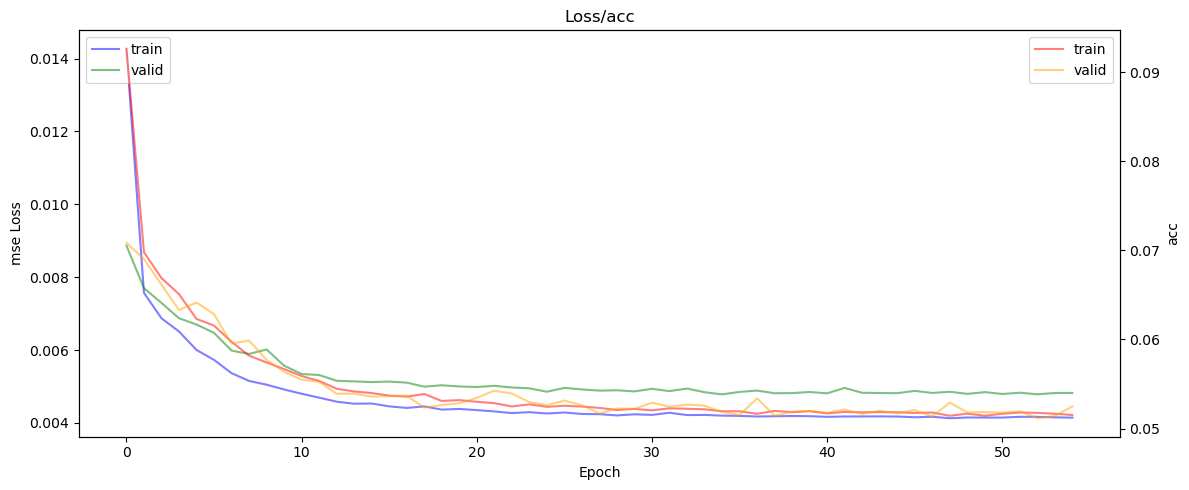

In [6]:
fig, ax = plt.subplots(figsize=(12,5))
ax2 = ax.twinx()

ax.set_title('Loss/acc')
ax.set_xlabel('Epoch')

ax.set_ylabel('mse Loss')
ax.plot(record['train_loss'], color='blue', alpha=0.5)
ax.plot(record['valid_loss'], color='green', alpha=0.5)

ax2.set_ylabel('acc')
ax2.plot(record['train_acc'], color='red', alpha=0.5)
ax2.plot(record['valid_acc'], color='orange', alpha=0.5)

ax.legend(['train', 'valid'], loc='upper left')
ax2.legend(['train', 'valid'], loc='upper right')

# ax.set_xticks(gdp['date'].dt.date)
# ax.set_xticklabels(gdp['date'].dt.year, rotation=90)
# ax.yaxis.grid(color='lightgray', linestyle='dashed')
plt.tight_layout()
plt.show()

In [7]:
config, device = global_setting('cfg.yaml')
model = load_model(device, config)

TypeError: empty() received an invalid combination of arguments - got (tuple, dtype=NoneType, device=NoneType), but expected one of:
 * (tuple of ints size, *, tuple of names names, torch.memory_format memory_format, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)
 * (tuple of SymInts size, *, torch.memory_format memory_format, Tensor out, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)


In [ ]:
checkpoint_dir='ckpt/{}'.format(config['MODEL']['NAME'])
file_name = os.listdir(checkpoint_dir)[-1]
print(file_name)
checkpoint_path='{}/{}'.format(checkpoint_dir, file_name)

In [ ]:
ckpt = torch.load(checkpoint_path)
model.load_state_dict(ckpt)

In [ ]:
df = pd.read_excel('res/total_set.xlsx')

In [ ]:
weather_cols = ['rain', 'wind', 'humidity', 'pressure', 'snow', 'cloud', 'visibility']
sensor_cols = ['Vertical', 'Horizontal', 'Module', 'Outdoor']

In [ ]:
import joblib
scaler_x = 'ckpt/SCALER/x_scaler.pkl'
scaler_y = 'ckpt/SCALER/y_scaler.pkl'
sc_x = joblib.load(scaler_x)
sc_y = joblib.load(scaler_y)

In [ ]:
input_df=df[weather_cols]
target_df = df[['total']]

In [ ]:
from torch import FloatTensor

sc_x = sc_x.transform(input_df.values[:100])
X_tensor = FloatTensor(sc_x)

In [ ]:
outputs = model(X_tensor)

In [ ]:
pred = sc_y.inverse_transform(outputs.float().detach().numpy()).ravel()
# pred = outputs.float().detach().numpy().ravel()

# target = sc_y.transform(target_df.values[:100]).ravel()
target = target_df.values[:100].ravel()


In [ ]:
fig = plt.figure(figsize=(20, 5))
plt.plot(pred, color='r', label='predict', alpha=0.5)
plt.plot(target, color='b', label='actual', alpha=0.5)
plt.show()